In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

warnings.filterwarnings("ignore")
all_data = pd.read_csv("spotify-2023.csv", encoding='ISO-8859-1')
all_data2 = pd.read_csv("spotify-2023.csv", encoding='ISO-8859-1')

In [408]:
all_data.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


### Data Overview

In [409]:
columns, rows = all_data.shape
print(f'There are {columns} Columns and {rows} Rows')

all_data.info()


There are 953 Columns and 24 Rows
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key   

In [410]:
missing_values = all_data.isnull().sum()
missing_values

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [411]:
# Drop missing val in key
all_data = all_data.dropna(subset=['key'])
# Replace Null values to 0 in in_shazam_charts
all_data['in_shazam_charts'].fillna(0, inplace=True)
# Convert to numeric datatype
all_data['streams'] = pd.to_numeric(all_data['streams'], errors='coerce')
all_data = all_data.dropna(subset=['streams'])


In [412]:
# Drop missing val in key
all_data2 = all_data2.dropna(subset=['key'])
# Replace Null values to 0 in in_shazam_charts
all_data2['in_shazam_charts'].fillna(0, inplace=True)
# Convert to numeric datatype
all_data2['streams'] = pd.to_numeric(all_data2['streams'], errors='coerce')
all_data2 = all_data2.dropna(subset=['streams'])

### Basic Descriptive Statistics 

In [358]:
all_data_mean = all_data['streams'].mean()
all_data_median = all_data['streams'].median()
all_data_standard_dev = all_data['streams'].std()

print(f'Mean                : {all_data_mean}')
print(f'Median              : {all_data_median}')
print(f'Standard Deviation  : {all_data_standard_dev}')



Mean                : 513355357.38856477
Median              : 284908316.0
Standard Deviation  : 571485476.7292064


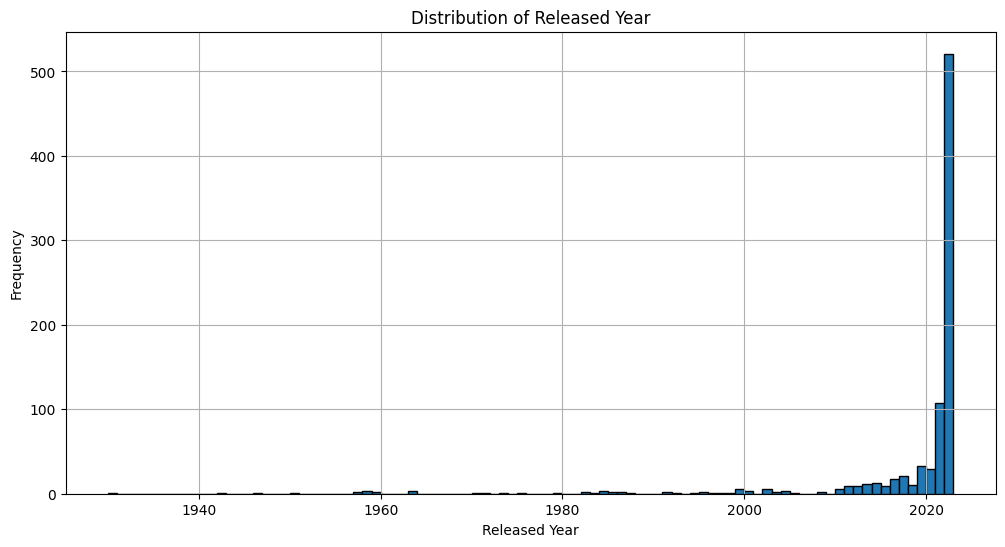

In [359]:
# Plot histogram for released_year
plt.figure(figsize=(12, 6))

all_data['released_year'].hist(bins=range(all_data['released_year'].min(), all_data['released_year'].max() + 1), edgecolor='black')
plt.title('Distribution of Released Year')
plt.xlabel('Released Year')
plt.ylabel('Frequency')
plt.show()

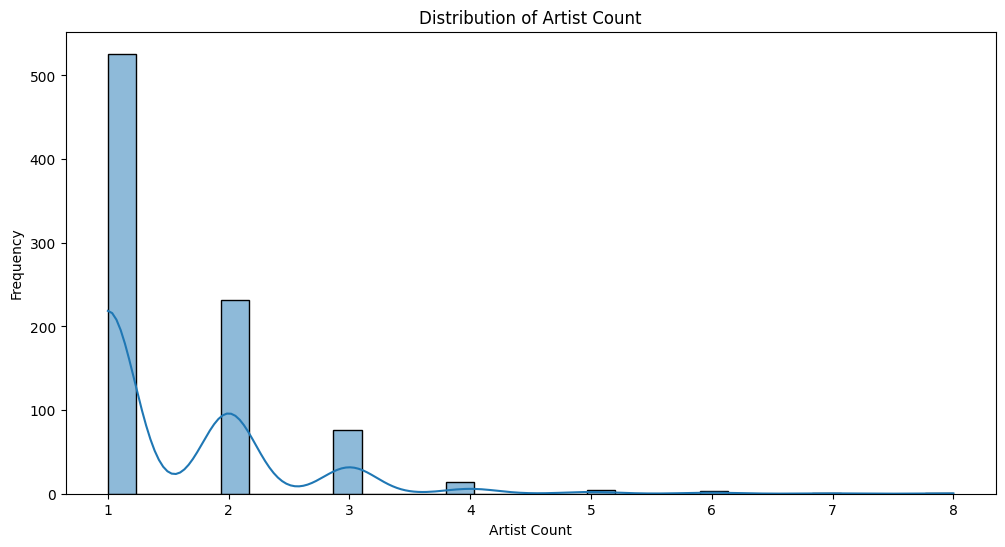

In [360]:
plt.figure(figsize=(12, 6))
sns.histplot(all_data['artist_count'], bins=30, kde=True)
plt.title('Distribution of Artist Count')
plt.xlabel('Artist Count')
plt.ylabel('Frequency')
plt.show()

### Top Performers

In [361]:
# Get the top 5 most streamed tracks
top_streamed_tracks = all_data.nlargest(5, 'streams')[['track_name','artist(s)_name','streams']]
print(top_streamed_tracks)


                                        track_name         artist(s)_name  \
55                                 Blinding Lights             The Weeknd   
179                                   Shape of You             Ed Sheeran   
86                               Someone You Loved          Lewis Capaldi   
620                                   Dance Monkey            Tones and I   
41   Sunflower - Spider-Man: Into the Spider-Verse  Post Malone, Swae Lee   

          streams  
55   3.703895e+09  
179  3.562544e+09  
86   2.887242e+09  
620  2.864792e+09  
41   2.808097e+09  


In [362]:
top_artists = all_data['artist(s)_name'].value_counts().head(5)
print(top_artists)

artist(s)_name
Taylor Swift    29
The Weeknd      17
SZA             17
Bad Bunny       16
Harry Styles    13
Name: count, dtype: int64


### Temporal Trends


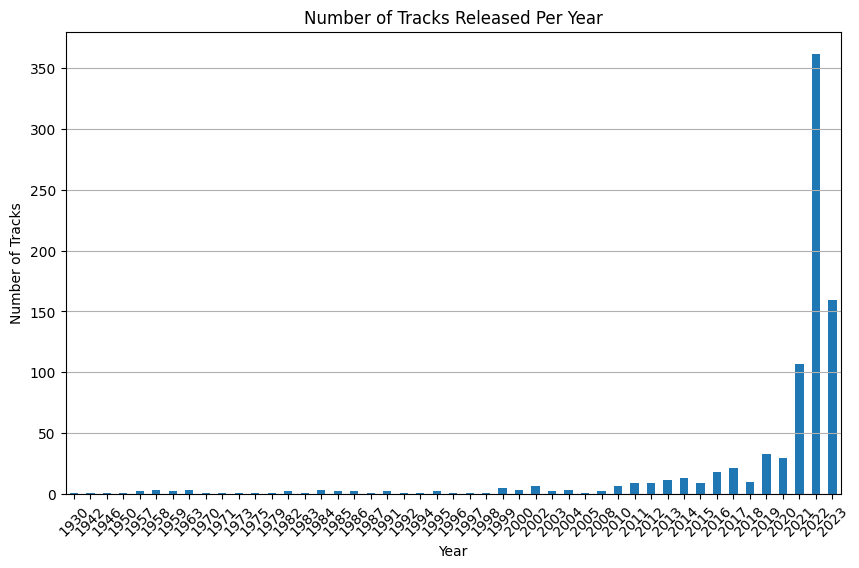

In [363]:
# Group by released_year and count the number of tracks
tracks_per_year = all_data['released_year'].value_counts().sort_index()

# Plot the number of tracks released per year
plt.figure(figsize=(10, 6))
tracks_per_year.plot(kind='bar')
plt.title('Number of Tracks Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Tracks')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

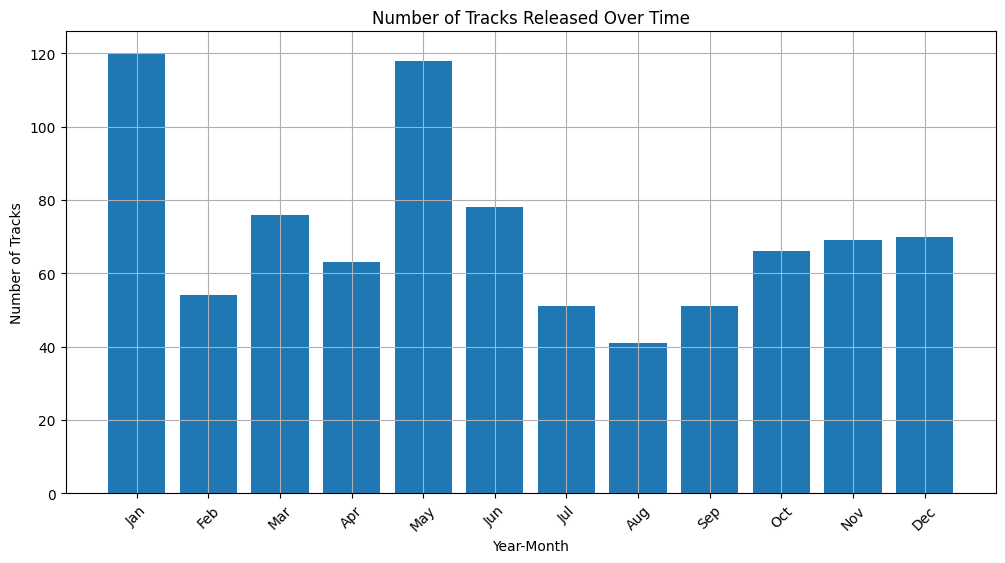

In [364]:
tracks_per_month = all_data.groupby('released_month').size()

# Step 3: Plot the data
plt.figure(figsize=(12, 6))
plt.bar(tracks_per_month.index, tracks_per_month.values)
plt.title('Number of Tracks Released Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Tracks')
plt.xticks(ticks=tracks_per_month.index, 
           labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
           rotation=45) 

plt.grid()
plt.show()

In [366]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

all_data['streams'] = scaler.fit_transform(all_data[['streams']])
print(all_data.head())

                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts   streams  in_apple_playlists  ...  bpm key   mode  \
0                147  0.038170                 

                 streams       bpm  valence_%  danceability_%  energy_%
streams         1.000000 -0.002163  -0.042787       -0.100702 -0.029714
bpm            -0.002163  1.000000   0.027436       -0.161907  0.016068
valence_%      -0.042787  0.027436   1.000000        0.397807  0.346820
danceability_% -0.100702 -0.161907   0.397807        1.000000  0.166331
energy_%       -0.029714  0.016068   0.346820        0.166331  1.000000


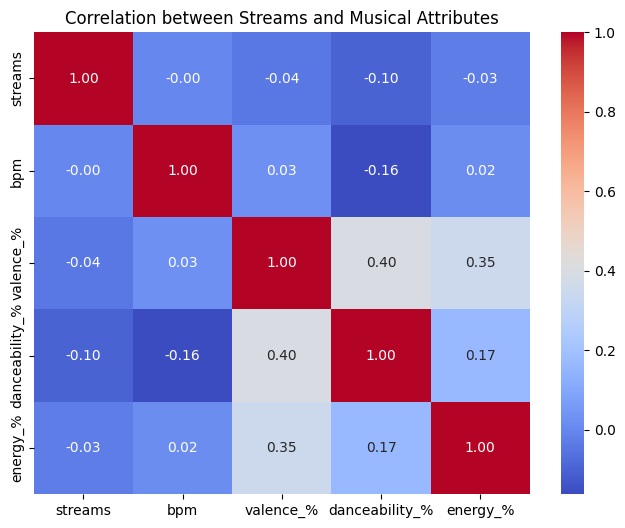

In [370]:
# Calculate the correlation matrix
correlation_matrix = all_data[['streams', 'bpm','valence_%', 'danceability_%', 'energy_%']].corr()

# Display the correlation matrix
print(correlation_matrix)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation between Streams and Musical Attributes')
plt.show()


In [371]:
# Correlation between danceability and energy
dance_energy_corr = all_data[['danceability_%', 'energy_%']].corr().iloc[0, 1]
print(f"Correlation between danceability and energy: {dance_energy_corr:.2f}")

# Correlation between valence and acousticness
valence_acoustic_corr = all_data[['valence_%', 'acousticness_%']].corr().iloc[0, 1]
print(f"Correlation between valence and acousticness: {valence_acoustic_corr:.2f}")


Correlation between danceability and energy: 0.17
Correlation between valence and acousticness: -0.07


### Platform Popularity 

In [413]:
spotify_playlist_count = all_data2['in_spotify_playlists'].sum()
spotify_chart_count = all_data2['in_spotify_charts'].sum()
apple_playlist_count = all_data2['in_apple_playlists'].sum()

print("Number of tracks in each platform:")
print(f"Spotify Playlists: {spotify_playlist_count}")
print(f"Spotify Charts: {spotify_chart_count}")
print(f"Apple Playlists: {apple_playlist_count}")


Number of tracks in each platform:
Spotify Playlists: 4460683
Spotify Charts: 10249
Apple Playlists: 57748


In [414]:
avg_streams_spotify_playlists = all_data2[all_data['in_spotify_playlists'] == 1]['streams'].mean()
avg_streams_spotify_charts = all_data2[all_data['in_spotify_charts'] == 1]['streams'].mean()
avg_streams_apple_playlists = all_data2[all_data['in_apple_playlists'] == 1]['streams'].mean()

print("\nAverage streams for tracks in each platform:")
print(f"Spotify Playlists: {avg_streams_spotify_playlists}")
print(f"Spotify Charts: {avg_streams_spotify_charts}")
print(f"Apple Playlists: {avg_streams_apple_playlists}")


Average streams for tracks in each platform:
Spotify Playlists: nan
Spotify Charts: 520669381.1875
Apple Playlists: 164785510.6875


### Advanced Analysis

In [396]:
all_data_clean = all_data.dropna(subset=['key', 'streams'])
all_data_clean['streams'] = pd.to_numeric(all_data_clean['streams'], errors='coerce')


In [397]:
avg_streams_by_key = all_data_clean.groupby('key')['streams'].mean().reset_index()


In [398]:
# Example mapping (adjust based on your data)
def classify_mode(key):
    if key in ['C', 'D', 'E', 'F', 'G', 'A', 'B']:  # Assuming these are Major keys
        return 'Major'
    else:
        return 'Minor'  # Assuming the rest are Minor

avg_streams_by_key['Mode'] = avg_streams_by_key['key'].apply(classify_mode)


In [399]:
avg_streams_by_mode = avg_streams_by_key.groupby('Mode')['streams'].mean().reset_index()


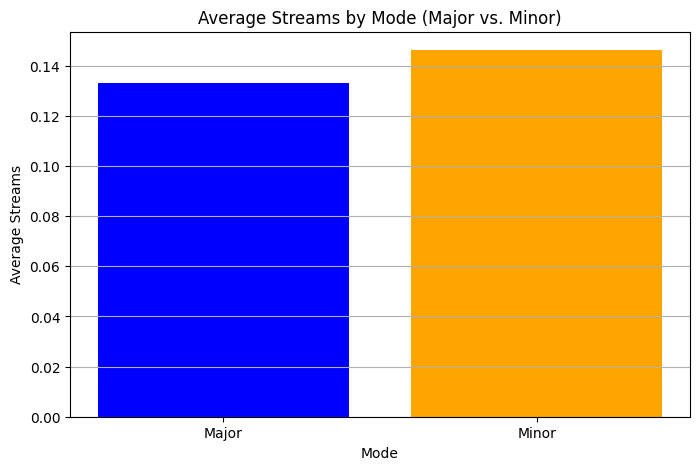

In [400]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(avg_streams_by_mode['Mode'], avg_streams_by_mode['streams'], color=['blue', 'orange'])
plt.title('Average Streams by Mode (Major vs. Minor)')
plt.xlabel('Mode')
plt.ylabel('Average Streams')
plt.grid(axis='y')
plt.show()


Do certain genres or artists consistently appear in more playlists or charts? Perform an 
analysis to compare the most frequently appearing artists in playlists or charts. 

In [401]:
# Count appearances in Spotify playlists
artist_playlist_counts = all_data[all_data['in_spotify_playlists'] == 1]['artist(s)_name'].value_counts()

# Count appearances in Spotify charts
artist_chart_counts = all_data[all_data['in_spotify_charts'] == 1]['artist(s)_name'].value_counts()

# Combine counts into a single DataFrame
artist_comparison = pd.DataFrame({
    'Playlists': artist_playlist_counts,
    'Charts': artist_chart_counts
}).fillna(0)  # Fill NaN with 0 for artists not present in one of the counts

# Sort by the number of appearances in playlists
artist_comparison_sorted = artist_comparison.sort_values(by='Playlists', ascending=False)
print(artist_comparison_sorted.head(10))  # Display top 10 artists


                                                    Playlists  Charts
artist(s)_name                                                       
Bad Bunny                                                 0.0       1
Daddy Yankee, Bad Bunny                                   0.0       1
Guns N' Roses                                             0.0       1
Harry Styles                                              0.0       5
IVE                                                       0.0       1
James Blake, Metro Boomin                                 0.0       1
Kendrick Lamar                                            0.0       1
Kevin Kaarl                                               0.0       1
Mambo Kingz, DJ Luian, Anuel Aa                           0.0       1
Quevedo, La Pantera, Juseph, Cruz Cafunï¿½ï¿½, ...        0.0       1


<Figure size 1200x600 with 0 Axes>

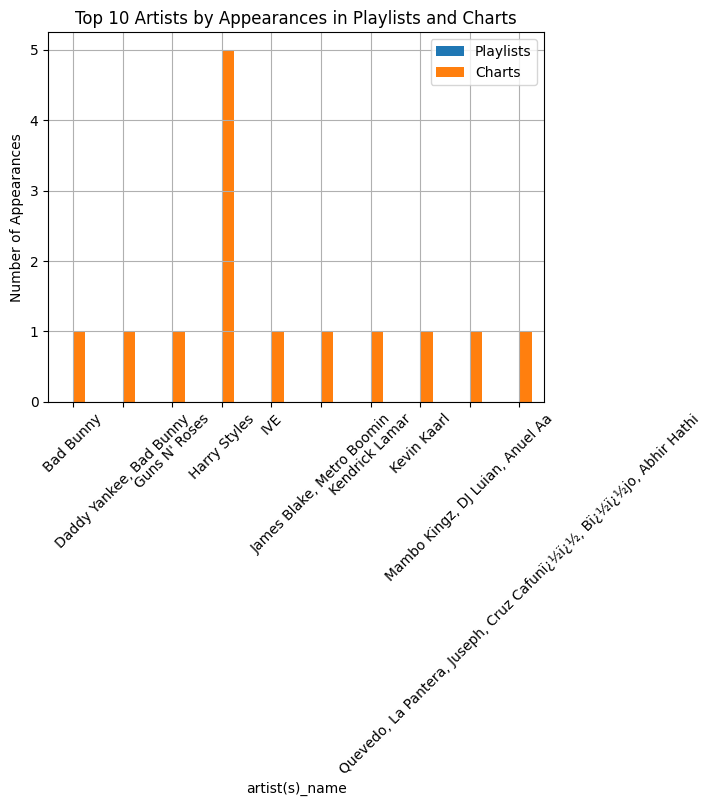

In [402]:
import matplotlib.pyplot as plt

# Plot top 10 artists
plt.figure(figsize=(12, 6))
artist_comparison_sorted.head(10).plot(kind='bar')
plt.title('Top 10 Artists by Appearances in Playlists and Charts')
plt.ylabel('Number of Appearances')
plt.xticks(rotation=45)
plt.grid()
plt.show()


In [394]:
artist_comparison['Total'] = artist_comparison['Playlists'] + artist_comparison['Charts']
artist_comparison_sorted_total = artist_comparison.sort_values(by='Total', ascending=False)
print(artist_comparison_sorted_total.head(10))  # Display top 10 artists by total appearances


                                                    Playlists  Charts  Total
artist(s)_name                                                              
Harry Styles                                              0.0       5    5.0
Bad Bunny                                                 0.0       1    1.0
Daddy Yankee, Bad Bunny                                   0.0       1    1.0
Guns N' Roses                                             0.0       1    1.0
IVE                                                       0.0       1    1.0
James Blake, Metro Boomin                                 0.0       1    1.0
Kendrick Lamar                                            0.0       1    1.0
Kevin Kaarl                                               0.0       1    1.0
Mambo Kingz, DJ Luian, Anuel Aa                           0.0       1    1.0
Quevedo, La Pantera, Juseph, Cruz Cafunï¿½ï¿½, ...        0.0       1    1.0


<Figure size 1200x600 with 0 Axes>

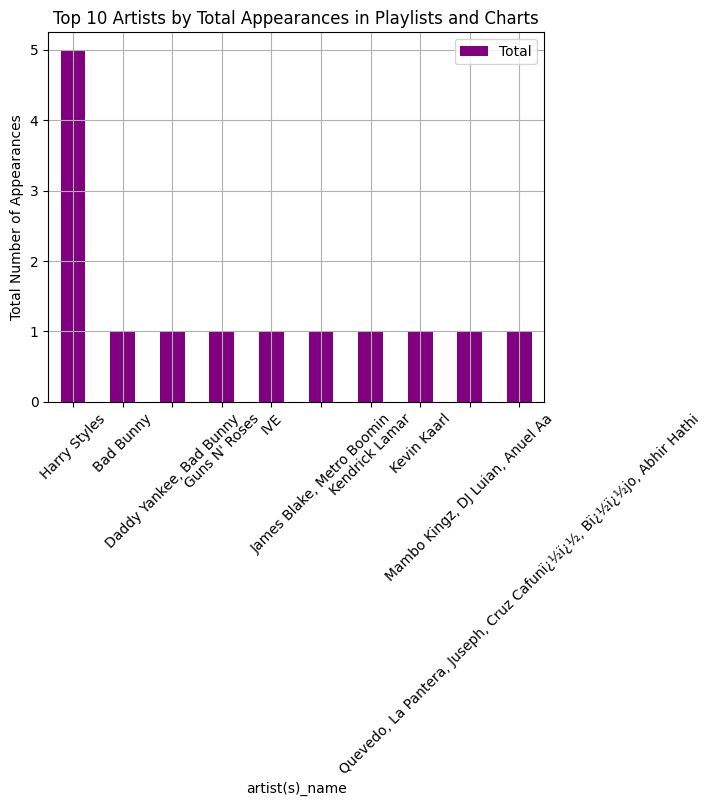

In [395]:
plt.figure(figsize=(12, 6))
artist_comparison_sorted_total.head(10).plot(kind='bar', y='Total', color='purple')
plt.title('Top 10 Artists by Total Appearances in Playlists and Charts')
plt.ylabel('Total Number of Appearances')
plt.xticks(rotation=45)
plt.grid()
plt.show()
